# Neste projeto foi aplicado Transfer Learning em uma rede de Deep Learning para classificar imagens de cães e gatos. Vamos utilizar o dataset de treinamento e teste de cães e gatos.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = 'C:\\Users\\anton\\OneDrive\\Documentos\\Data Projects\\Visão Computacional\\Cachorro e Gatos\\train'
validation_dir = 'C:\\Users\\anton\\OneDrive\\Documentos\\Data Projects\\Visão Computacional\\Cachorro e Gatos\\test'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [5]:
# Modelo InceptionResNetV2
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import RMSprop

base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Modelo ResNet50 (Menos acurácia)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10


c:\Users\anton\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.7156 - loss: 0.8802 - val_accuracy: 0.4922 - val_loss: 2.8954
Epoch 2/10
 1/17 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.1407

c:\Users\anton\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.0000 - loss: 0.1407 - val_accuracy: 0.5833 - val_loss: 3.1711
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9170 - loss: 0.2341 - val_accuracy: 0.6562 - val_loss: 4.7658
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8125 - loss: 0.3839 - val_accuracy: 0.9167 - val_loss: 0.4062
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.9403 - loss: 0.1771 - val_accuracy: 0.7656 - val_loss: 11.4400
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9375 - loss: 0.1196 - val_accuracy: 0.7500 - val_loss: 4.9644
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9620 - loss: 0.0963 - val_accuracy: 0.6875 - val_loss: 14.7523
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9375 - loss: 0.4095 - val_accuracy: 0.7500 - val_loss: 85.1370
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.9616 - loss: 0.1529 - val_accuracy: 0.7031 - val_loss: 6.7

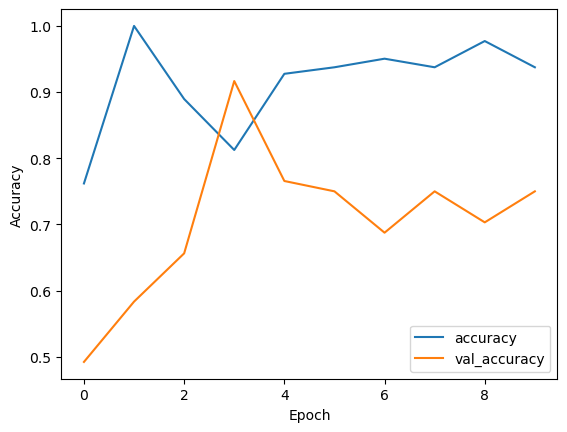

In [7]:
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['val_accuracy'], label='Acurácia Valida')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy:', accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.7563 - loss: 2.5901
Test accuracy: 0.7714285850524902
